In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
iris = pd.read_csv('./iris-data.csv')
iris.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c7f6a50>,
      dtype=object)

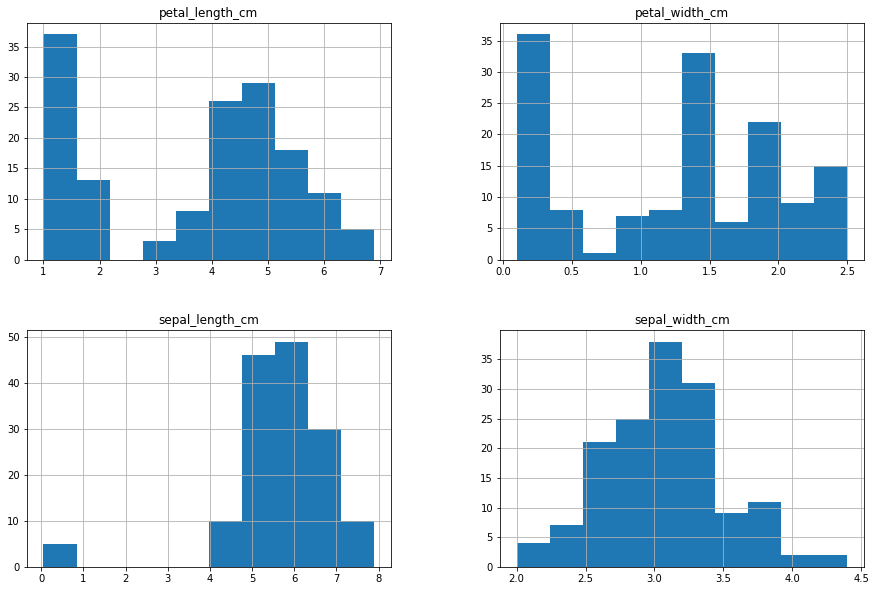

In [3]:
iris.hist(figsize=(15,10))

In [31]:
#There seems to be an outlier in sepal length data.

In [30]:
#Sepal length has a minimum value of 0.055 which could be a mistake.
iris.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [14]:
#lets look at null values rows and decide what to do with them. There are only 5 rows with null values
#we don't do anything, just leave it as it is.

iris[iris.isnull().any(axis=1)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


In [8]:
iris.dtypes

sepal_length_cm    float64
sepal_width_cm     float64
petal_length_cm    float64
petal_width_cm     float64
class               object
dtype: object

In [9]:
#find unique values for 'class' 
iris['class'].unique()
iris['class'].value_counts()

Iris-virginica     50
Iris-setosa        49
Iris-versicolor    45
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

In [10]:
#check to see which values should have the same name, ie Iris-versicolor and versicolor
iris.replace(to_replace =['versicolor', 'Iris-setossa'], value=['Iris-versicolor', 'Iris-setosa'], inplace=True)
iris['class'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: class, dtype: int64

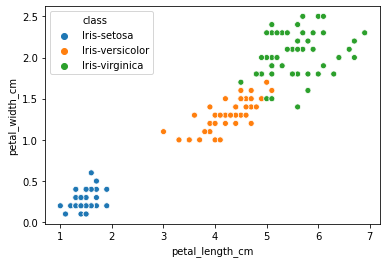

In [11]:
sns.scatterplot(x='petal_length_cm', y='petal_width_cm', data=iris, hue='class')
plt.show()

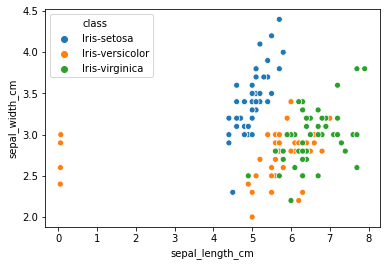

In [12]:
sns.scatterplot(x='sepal_length_cm', y='sepal_width_cm', data=iris, hue='class')
plt.show()

In [26]:
iris.head()
iris['sepal_length_cm'].unique()

array([5.1  , 4.9  , 4.7  , 4.6  , 5.   , 5.4  , 4.4  , 4.8  , 5.7  ,
       5.8  , 5.2  , 5.5  , 4.5  , 5.3  , 7.   , 6.4  , 6.9  , 6.5  ,
       6.3  , 6.6  , 5.9  , 6.   , 6.1  , 5.6  , 6.7  , 6.2  , 6.8  ,
       0.067, 0.06 , 0.057, 0.055, 7.1  , 7.6  , 7.3  , 7.2  , 7.7  ,
       7.4  , 7.9  ])

In [27]:
#It appears that there may be a wrong data entry in 'sepal length' column, it was entered either zero and/or less than 1 for length
#We need to find those rows and remove them.

iris.loc[iris['sepal_length_cm'] < 1]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


In [29]:
print(iris.shape)
iris_upd = iris.drop([iris.index[77], iris.index[78], iris.index[79], iris.index[80], iris.index[81]])
print(iris_upd.shape)

(150, 5)
(145, 5)


In [32]:
iris_upd.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f2608d0>,
      dtype=object)

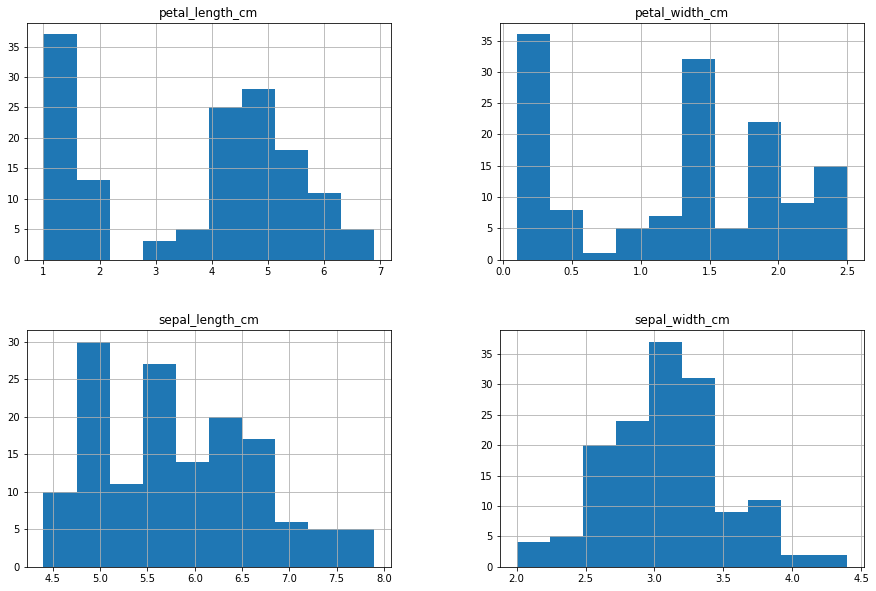

In [33]:
iris_upd.hist(figsize=(15,10))